In [21]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from scipy.interpolate import interp1d
from matplotlib.backends.backend_pdf import PdfPages

In [22]:
dir = "//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/"

In [23]:
f38_v1_1 = ert.load(dir + 'raw_data/kamik_f38_v1_01.txt')
f38_v1_2 = ert.load(dir + 'raw_data/kamik_f38_v1_02.txt')
f38_v1_3 = ert.load(dir + 'raw_data/kamik_f38_v1_03.txt')
f38_v1_4 = ert.load(dir + 'raw_data/kamik_f38_v1_04.txt')
f38_v1_5 = ert.load(dir + 'raw_data/kamik_f38_v1_05.txt')
f38_diag1_1 = ert.load(dir + 'raw_data/kamik_f38_diag1_01.txt')
f38_diag1_2 = ert.load(dir + 'raw_data/kamik_f38_diag1_02.txt')
f38_diag1_3 = ert.load(dir + 'raw_data/kamik_f38_diag1_03.txt')
f38_v1_topo = pd.read_csv(dir + 'topo_data/kamik_f38_v1_topo.txt', sep='\s+', header=None)
f38_diag1_topo = pd.read_csv(dir + 'topo_data/kamik_f38_diag1_topo.txt', sep='\s+', header=None)

In [13]:
f38_v1_1['a'], f38_v1_1['m'] = f38_v1_1['m'].copy(), f38_v1_1['a'].copy()
f38_v1_1['b'], f38_v1_1['n'] = f38_v1_1['n'].copy(), f38_v1_1['b'].copy()

In [24]:
v1 = [f38_v1_1, f38_v1_2, f38_v1_3, f38_v1_4, f38_v1_5]

In [16]:
f38_v1_2.remove(f38_v1_2['err']>=0.002)

In [38]:
for data in v1:
    data["k0"] = ert.createGeometricFactors(data)
    data["r"] = data["rhoa"]/data["k0"]

25/09/25 - 20:30:48 - pyGIMLi - INFO - Save RVector binary
25/09/25 - 20:30:48 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2053193745935241633
25/09/25 - 20:30:48 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3259436451371053660
25/09/25 - 20:30:48 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\7688795662786179070
25/09/25 - 20:30:48 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2435875899140599606


25/09/25 - 20:30:48 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6492685957552125796


In [ ]:
#v1[0]['rhoa'] = v1[0]['rhoa'] /100

#v1[0]['err'] = v1[0]['err'] /100
#v1[1]['err'] = v1[1]['err']/100

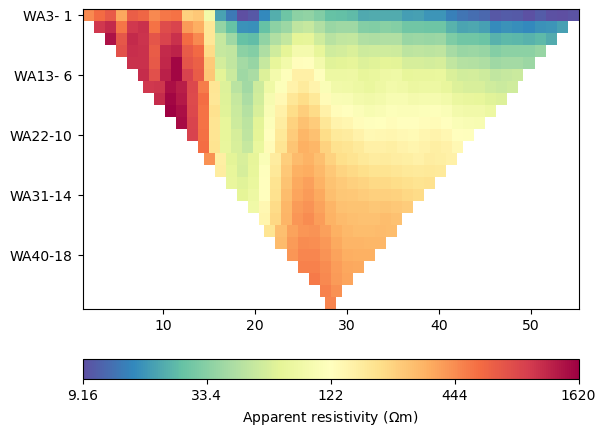

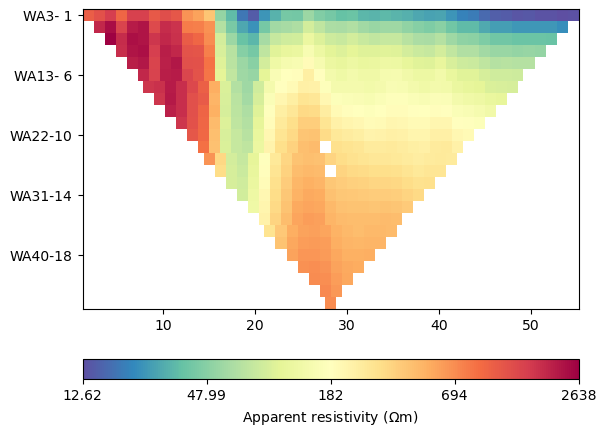

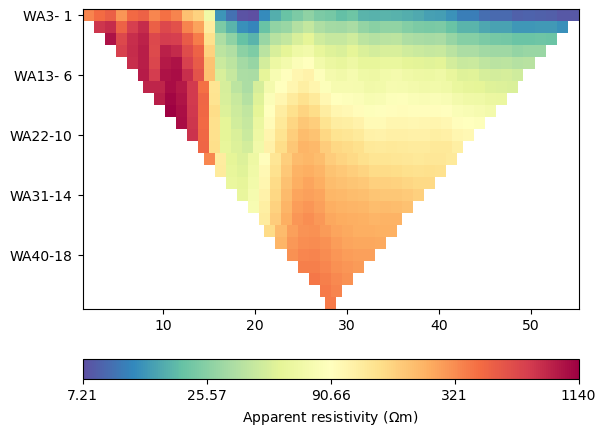

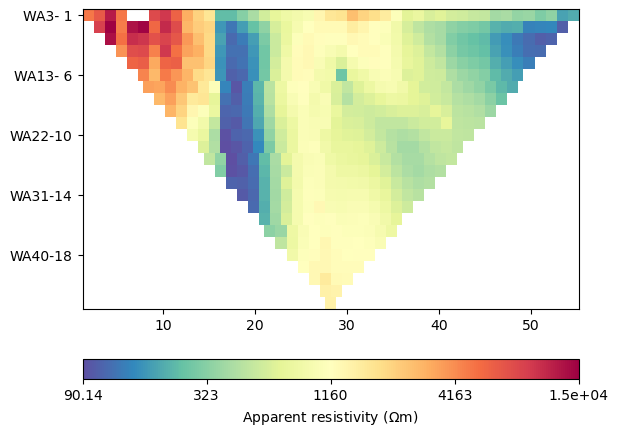

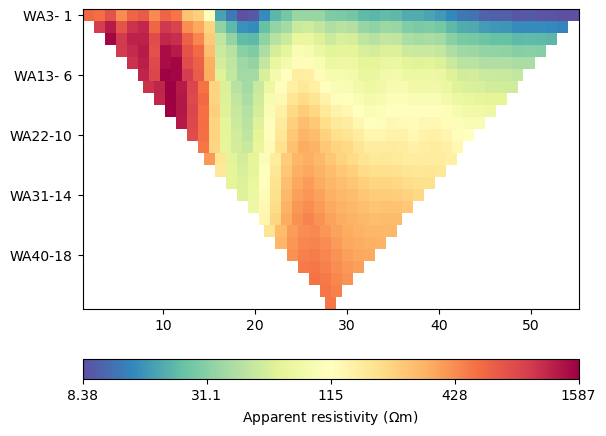

In [25]:
for i in v1:
    ert.showData(i)

In [19]:
for i in v1[2:4]:
    i['err'] = i['err']*np.sqrt(2)

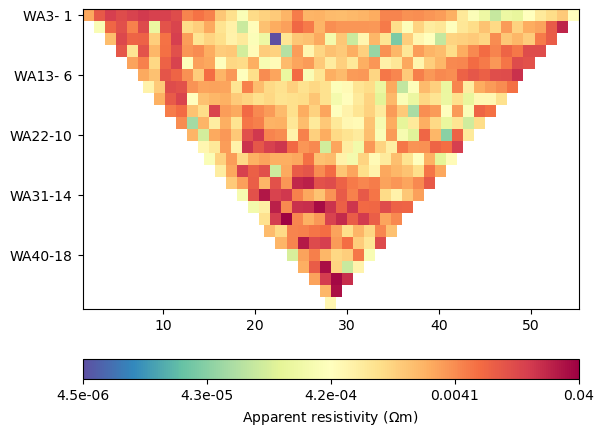

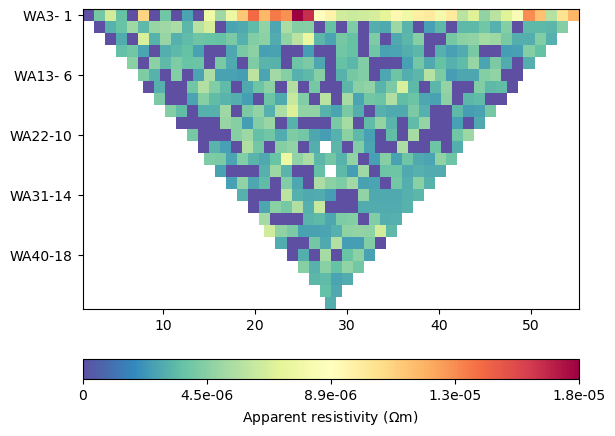

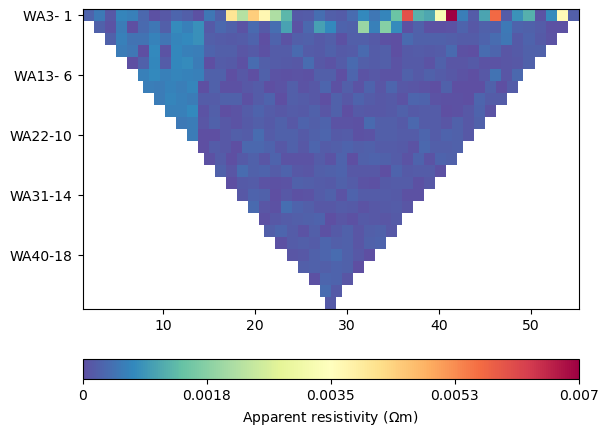

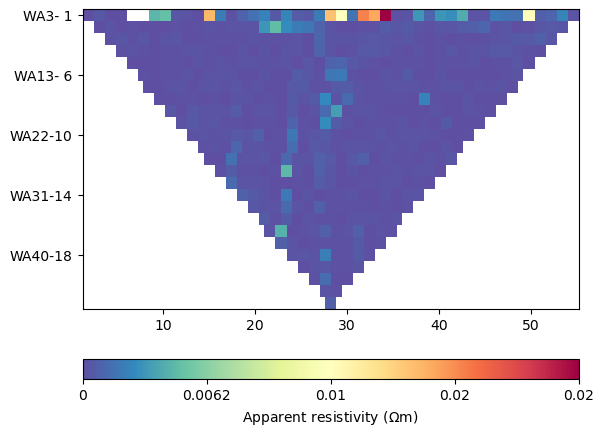

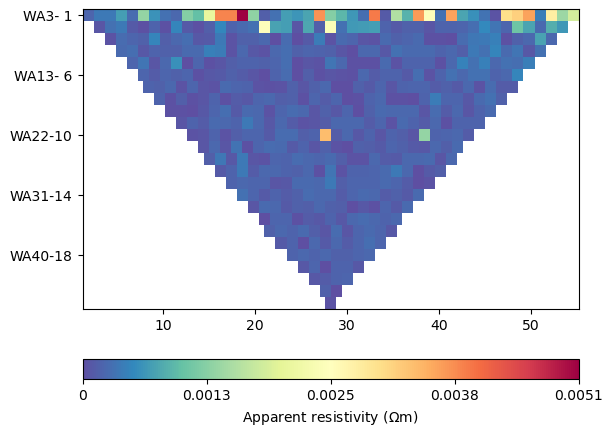

In [26]:
for i in v1:
    ert.showData(i, i['err'])

In [27]:
v1[0].save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_v1_01.txt", "a b m n err iperr rhoa u i r")
v1[1].save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_v1_02.txt", "a b m n err iperr rhoa u i r")
v1[2].save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_v1_03.txt", "a b m n err iperr rhoa u i r")
v1[3].save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_v1_04.txt", "a b m n err iperr rhoa u i r")
v1[4].save("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/raw_data/kamik_f38_v1_05.txt", "a b m n err iperr rhoa u i r")

1